In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('grouping.csv').drop('Unnamed: 0',axis = 1)
list(df)

['LoanID',
 'Terms',
 'IsInternalRefinance',
 'IsExternalRefinance',
 'Gender',
 'State',
 'SalaryFrequencyID',
 'VehicleYear',
 'Make',
 'ApplicationTermMonths',
 'ApplicationDate',
 'MonthlyPayment',
 'Month',
 'Loan_Default',
 'LoanAmount_Group',
 'Salary_Group',
 'SP_Ratio_Group',
 'V_Age_Group',
 'Interest',
 'CO_APP_Default_Status',
 'Mileage_Group',
 'Risky_Area',
 'Age_Group']

In [102]:
df.Loan_Default.unique()

array([False,  True], dtype=bool)

In [103]:
temp = df.Loan_Default.replace(False, 0)

In [104]:
df['Loan_Default'] = df.Loan_Default.astype(int)

In [114]:
df.iloc[[38]]

,LoanID,Terms,IsInternalRefinance,IsExternalRefinance,Gender,State,SalaryFrequencyID,VehicleYear,Make,ApplicationTermMonths,...,Loan_Default,LoanAmount_Group,Salary_Group,SP_Ratio_Group,V_Age_Group,Interest,CO_APP_Default_Status,Mileage_Group,Risky_Area,Age_Group
38,7803,36,False,False,M,CO,1.0,2015,TOYOTA,24,...,0,>=9000,2000-4000,5-10,0-5,0.21,None,<75000,False,30-39


In [115]:
df.to_csv('example.csv')

In [105]:
data = df[['Month','Terms','IsExternalRefinance','Gender','Risky_Area',\
            'SP_Ratio_Group','LoanAmount_Group','Age_Group','Loan_Default']]

In [17]:
data.to_csv('LR_data.csv')

In [18]:
data.columns = ['Month','Terms','IsExternalRefinance','Gender','Risky_Area',\
                'SP_Ratio','LoanAmount','Age','y']

In [19]:
data.groupby('y').count()

,Month,Terms,IsExternalRefinance,Gender,Risky_Area,SP_Ratio,LoanAmount,Age
y,,,,,,,,
0,3476,3476,3476,3476,3476,3285,3476,3475
1,341,341,341,341,341,331,341,341


In [23]:
data['SP_Ratio'] = data.SP_Ratio.fillna('0-5')

/Users/Isabella/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data['Age'] = data.Age.fillna('18-29')

/Users/Isabella/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
data.groupby('y').count()

,Month,Terms,IsExternalRefinance,Gender,Risky_Area,SP_Ratio,LoanAmount,Age
y,,,,,,,,
0,3476,3476,3476,3476,3476,3476,3476,3476
1,341,341,341,341,341,341,341,341


In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

cat_vars=['Month','Terms','IsExternalRefinance','Gender','Risky_Area',\
                'SP_Ratio','LoanAmount','Age']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['Month','Terms','IsExternalRefinance','Gender','Risky_Area',\
                'SP_Ratio','LoanAmount','Age']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

/Users/Isabella/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
data_final=data[to_keep]
data_final.columns.values

array(['y', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'Terms_12', 'Terms_24', 'Terms_36', 'Terms_48',
       'IsExternalRefinance_False', 'IsExternalRefinance_True', 'Gender_F',
       'Gender_M', 'Gender_U', 'Risky_Area_False', 'Risky_Area_True',
       'SP_Ratio_0-5', 'SP_Ratio_10-15', 'SP_Ratio_5-10', 'SP_Ratio_>=15',
       'LoanAmount_0-3000', 'LoanAmount_3000-6000', 'LoanAmount_6000-9000',
       'LoanAmount_>=9000', 'Age_18-29', 'Age_30-39', 'Age_40-49',
       'Age_50&above'], dtype=object)

In [28]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

/Users/Isabella/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False  True False  True False False  True  True  True
  True False False False  True False  True  True  True  True False False
  True False False False  True False  True  True False  True  True]
[ 8  1 16  3  1  2  1 15 12  1  1  1  1  5  4  6  1 18  1  1  1  1 17 10  1
 14  7  9  1 11  1  1 13  1  1]


array(['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'Terms_12', 'Terms_24', 'Terms_36', 'Terms_48',
       'IsExternalRefinance_False', 'IsExternalRefinance_True', 'Gender_F',
       'Gender_M', 'Gender_U', 'Risky_Area_False', 'Risky_Area_True',
       'SP_Ratio_0-5', 'SP_Ratio_10-15', 'SP_Ratio_5-10', 'SP_Ratio_>=15',
       'LoanAmount_0-3000', 'LoanAmount_3000-6000', 'LoanAmount_6000-9000',
       'LoanAmount_>=9000', 'Age_18-29', 'Age_30-39', 'Age_40-49',
       'Age_50&above'], dtype=object)
       
The Recursive Feature Elimination (RFE) has helped us select the following features: 
'Month_2','Month_5','Month_7','Month_10', 'Month_11','Month_12','Terms_12','IsExternalRefinance_False','Gender_F',
'Gender_M', 'Gender_U','Risky_Area_False','SP_Ratio_10-15','LoanAmount_3000-6000','LoanAmount_>=9000', 'Age_18-29','Age_40-49','Age_50&above'

In [94]:
cols=['Month_2','Month_5','Month_7','Month_10', 'Month_11','Month_12',\
      'Terms_12','IsExternalRefinance_False','Gender_F','Gender_M',\
      'Risky_Area_False','SP_Ratio_10-15','LoanAmount_3000-6000','LoanAmount_>=9000',\
      'Age_18-29','Age_40-49','Age_50&above'] 
X=data_final[cols]
y=data_final['y']

In [95]:
# Implement the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.279154
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3817
Model:                          Logit   Df Residuals:                     3800
Method:                           MLE   Df Model:                           16
Date:                Wed, 29 Nov 2017   Pseudo R-squ.:                 0.07258
Time:                        07:33:35   Log-Likelihood:                -1065.5
converged:                       True   LL-Null:                       -1148.9
                                        LLR p-value:                 3.689e-27
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Month_2                       0.2249      0.303      0.742      0.458      -0.

Logistic Regression Model Fitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) from sklearn.linear_model import LogisticRegression from sklearn import metrics logreg = LogisticRegression() logreg.fit(X_train, y_train)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [98]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.909


In [99]:
from sklearn.metrics import confusion_matrix
log_matrix = confusion_matrix(y_test, y_pred)
print(log_matrix)

[[1048    0]
 [  98    0]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.96      1048
          1       0.00      0.00      0.00        98

avg / total       0.84      0.91      0.87      1146



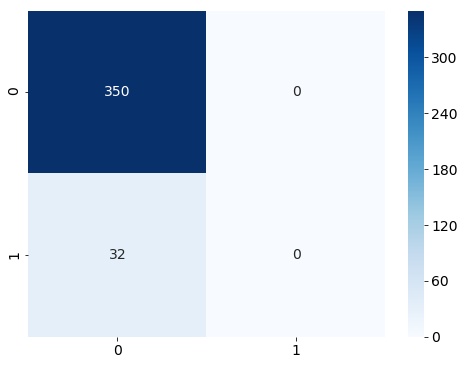

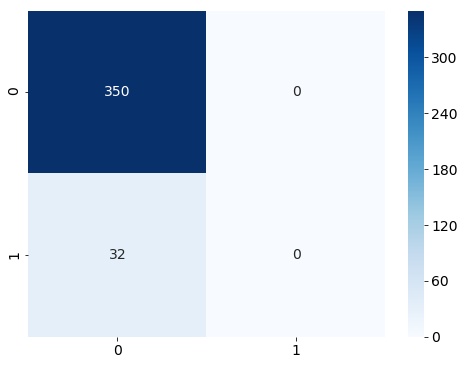

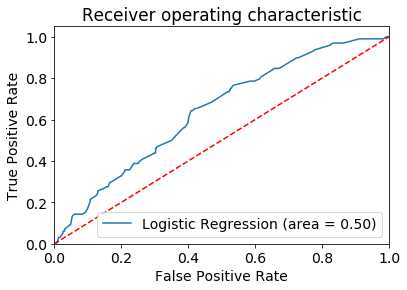

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import gcp
# import gcp.bigquery as bq
# import skflow
# import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [85]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(log_matrix,annot=True,cmap = 'Blues',ax = ax,fmt = 'g')